In [29]:
import numpy as np
import pandas as pd
from pathlib import Path


from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.cluster import KMeans

In [40]:
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv(r"data/v1.csv")

In [66]:
df.head(1)

,Unnamed: 0,id_mail,date,from,to,subject,body,x_origin
0,0,<24597416.1075840072483.JavaMail.evans@thyme>,"Fri, 28 Jul 2000 07:02:00 -0700 (PDT)",bill.haack@haack.com,jeff.skilling@enron.com,FW: YPO Area conference dates,"Obviously, these dates are for year 2001!\n\n>...",SKILLING-J


In [67]:
stopwords = ENGLISH_STOP_WORDS
my_stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient', 'sent', 'enron', 'cc', 'subject',\
                                         'forwarded', 'corp', 'said', 'attached', 'ect',\
                                         'recipient', 'email', 'original', 'doc', 'pm', 'mail', 'message', 'new'\
                                         'enronxgate', 'na', 'year'])


# tf = TfidfVectorizer(analyzer='word', stop_words=my_stopwords, min_df=2, max_df=0.5)
cv = CountVectorizer(analyzer='word', stop_words=my_stopwords, max_features=2000)

# vectorizer = TfidfVectorizer(stop_words='english')
X = cv.fit_transform(df['body']) # this is my sparce matrix

In [68]:
X_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names()) # this is my dense matrix

/Users/hsinhan/PycharmProjects/Enron_Email_Usecase/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
X_df.head(1)

,00,000,00am,00pm,01,018,02,03,04,05,...,wrote,www,xls,yahoo,years,yes,yesterday,york,young,ypo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
X_df.iloc[:,114:].head(1)

,ability,able,accept,accepted,access,according,account,accounting,accounts,achieve,...,wrote,www,xls,yahoo,years,yes,yesterday,york,young,ypo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
X_df = X_df.drop(X_df.iloc[:, 0:114], axis = 1).head(1)

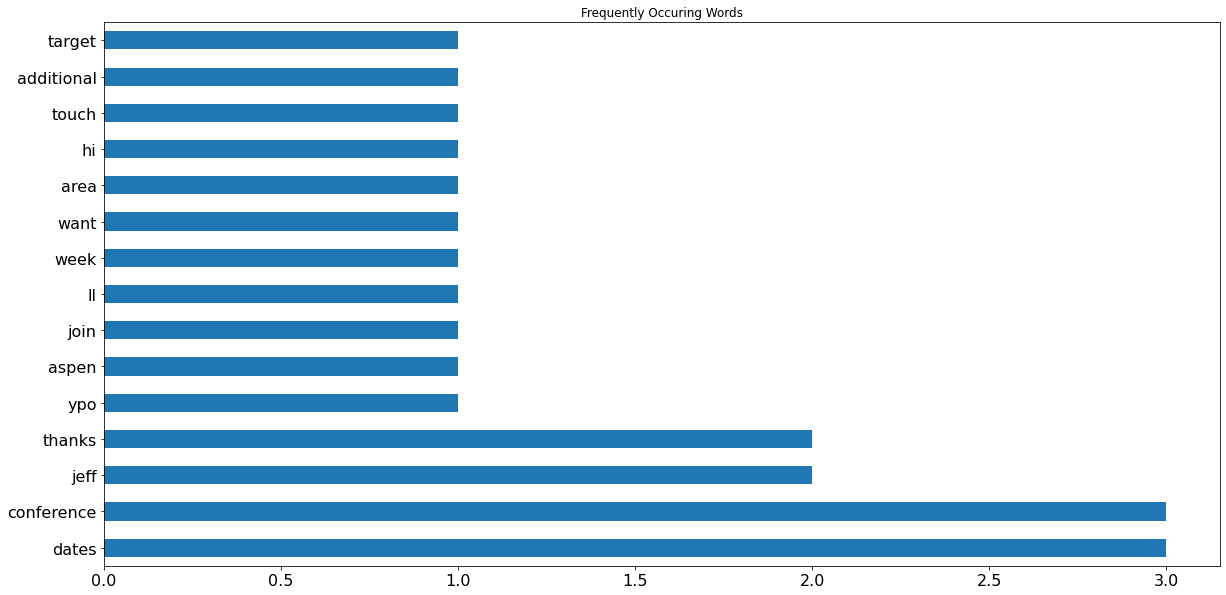

In [72]:
X_df.sum().sort_values(ascending=False).head(15).plot(kind='barh',
                                                                  figsize=(20,10),
                                                                  fontsize=16,
                                                                  title='Frequently Occuring Words');


In [73]:
X_df.shape

(1, 1886)

In [62]:
model = KMeans(n_clusters=3)
model.fit(X_df)

ValueError: n_samples=1 should be >= n_clusters=3.